# This notebook demonstrates how to download the netcdf POES data files (in netcdf format) for a given date range (there are multiple files per day), process them to get auroral boundary (equatorward) and plot it!


In [5]:
import os
import datetime
from poes import dwnld_poes, get_aur_bnd, poes_plot_utils
from davitpy import utils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# dates to download raw poes files
sTimePOES = datetime.datetime( 2015,4,9 )
eTimePOES = datetime.datetime( 2015,4,9 )
# dir to store raw poes files
dayCount = (eTimePOES - sTimePOES).days + 1
# Loop through the days and download files
for inpDate in (sTimePOES + \
            datetime.timedelta(n) for n in range(dayCount)):
    poesDwnldObj = dwnld_poes.PoesDwnld(inpDate)
    # NOTE : set a proper outdir otherwise the data
    # is saved in the working directory by default
    poesFiles = poesDwnldObj.get_all_sat_data(outDir="/tmp/poes/raw")

downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/noaa18/poes_n18_20150409_proc.nc
moving file to destination folder poes_n18_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/metop01/poes_m01_20150409_proc.nc
moving file to destination folder poes_m01_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/noaa19/poes_n19_20150409_proc.nc
moving file to destination folder poes_n19_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/metop02/poes_m02_20150409_proc.nc
moving file to destination folder poes_m02_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/

In [3]:
# Read data from the POES files
# and get the auroral boundary location
# by fitting a circle
poesRdObj = get_aur_bnd.PoesAur()
( poesAllEleDataDF, poesAllProDataDF ) = poesRdObj.read_poes_data_files(\
                                            poesRawDate=sTimePOES,\
                                            poesRawDir="/tmp/poes/raw/" )
# Or you can uncomment the line below and read the data!
# ( poesAllEleDataDF, poesAllProDataDF ) = poesRdObj.read_poes_data_files(poesFiles)
# Get for a given time get the closest satellite passes
# We can do this at multiple instances for a given time range/step
timeRange = [ poesAllEleDataDF["date"].min(),\
                 poesAllEleDataDF["date"].max() ]
# aurPassDF contains closest passes for a given time 
# for all the satellites in both the hemispheres!
aurPassDF = poesRdObj.get_closest_sat_passes( poesAllEleDataDF,\
                                    poesAllProDataDF, timeRange )
# determine auroral boundaries from all the POES satellites
# at a given time. The procedure is described in the code! 
# go over it!!!
eqBndLocsDF = poesRdObj.get_nth_ele_eq_bnd_locs( aurPassDF,\
                                                poesAllEleDataDF )
# to get an estimate of the auroral boundary! fit a circle
# to the boundaries determined from each satellite!
# The fits are written to a file and can be stored in 
# a given location
# NOTE : set a proper outdir otherwise the data
# is saved in the working directory by default
poesRdObj.fit_circle_aurbnd(eqBndLocsDF, outDir="/tmp/poes/bnd/")

fileList not set! Working with poesRawDate & poesRawDir


/usr/local/lib/python2.7/dist-packages/sataurlib-1.0.0b1-py2.7.egg/poes/get_aur_bnd.py:496: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 2
/usr/local/lib/python2.7/dist-packages/sataurlib-1.0.0b1-py2.7.egg/poes/get_aur_bnd.py:497: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 2
/usr/local/lib/python2.7/dist-packages/sataurlib-1.0.0b1-py2.7.egg/poes/get_aur_bnd.py:503: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 5
/usr/local/lib/python2.7/dist-packages/sataurlib-1.0.0b1-py2.7.egg/poes/get_aur_bnd.py:496: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 3
/usr/local/lib/python2.7/dist-packages/sataurlib-1.0.0b1

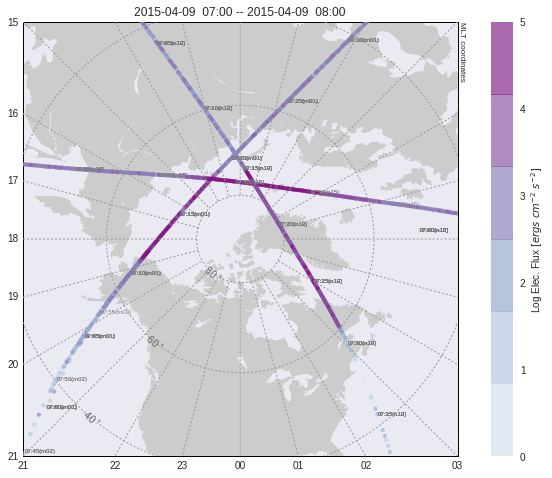

In [6]:
pltDate = datetime.datetime(2015,4,9)
timeRange = [ datetime.datetime(2015,4,9,7), datetime.datetime(2015,4,9,8) ]
coords = "mlt"

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=timeRange[0])
poesPltObj = poes_plot_utils.PlotUtils(pltDate, pltCoords=coords)
poesPltObj.overlay_sat_pass(timeRange,m,ax,"/tmp/poes/raw/")
fig.savefig("figs/poes-demo.pdf",bbox_inches='tight')